In [1]:
from sklearn.datasets import load_boston
boston = load_boston()


In [2]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [48]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
Y.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: PRICE, dtype: float64

In [111]:
import warnings
warnings.filterwarnings("ignore")
import sklearn.cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [112]:
number_of_features=X_train.shape[1]


In [349]:
import numpy as np
#weights=np.random.uniform(size=number_of_features+1)
weights = [0.0 for i in range(number_of_features+1)]
weights


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [350]:
len(weights)

14

In [351]:
learning_rate=-0.000001
number_of_iterations=1000
batch_size=100


In [352]:
def predicted_value(train_row,weights):
    predicted=weights[len(weights)-1]
    #print ("Train row",train_row)
    #print ("weights",weights)
    for i in range(len(train_row)-1):
        predicted=predicted+weights[i]*train_row[i]
       # print (predicted)
    return predicted
done=0
for iteration in range(number_of_iterations):
    if done:
        break 
    train_set=X_train.sample(n=batch_size,random_state=2,replace=True) #,random_state=2
    
    for index,row in train_set.iterrows():
        expected=Y_train[index]
       # print (row,weights)
        predicted=predicted_value(row,weights)
        #print (expected,predicted)
        error=expected-predicted
        #print (expected,predicted)
       # print ("iteration , learning rate , error",iteration,learning_rate,error)
        if error<2 and error>-2:
            done=1
            break
        #print ("error",error)
       # print (error)
       # print (weights)
        #print ("factor",learning_rate*(-2)*row*error)
        #weights=weights[0:len(weights)-1]-learning_rate*(-2)*row*error
       # weights[13]
        #print (row)
        for i in range(len(row)):
        
            weights[i]=weights[i]-2*learning_rate*row[i]*error
        weights[len(weights)-1]+=2*learning_rate*error
        #print (weights)
    learning_rate=learning_rate/2
        

In [353]:
weights

[1.8417419999999998e-06,
 0.0069795,
 0.00017173799999999995,
 0.0,
 3.510899999999999e-05,
 0.0006438059999999999,
 0.0013282199999999997,
 0.0005304419999999999,
 0.0001692,
 0.0294408,
 0.0012436199999999998,
 0.033449148,
 0.000263106,
 -8.46e-05]

In [354]:
#Y_test

In [355]:
Y_pred=[]
for index,row in X_test.iterrows():
    Y_pred.append(predicted_value(row,weights))
Y_pred

[22.141620687158685,
 21.11072003903937,
 21.183662910686795,
 33.05239269129871,
 19.876647774600713,
 24.022566738202528,
 21.46808386859224,
 21.205294088693456,
 26.089505748789264,
 32.90299397084284,
 21.5144208900429,
 19.964205027697957,
 22.336453340257655,
 20.020197014440072,
 20.024983748362633,
 22.661141893565343,
 20.73946094579356,
 23.450455315725588,
 24.915594805874683,
 19.86413941131156,
 31.748406982775997,
 25.935081836578668,
 22.052767714413307,
 22.289874775250116,
 22.277533178460782,
 27.818097616132803,
 21.830533534731728,
 26.00050134429961,
 19.715095953359544,
 25.00246904550409,
 18.08349595223096,
 32.605943592192034,
 33.046312179451974,
 32.35030298298217,
 22.80847099985421,
 26.3073812796617,
 22.163716844239048,
 20.028242088250845,
 20.997885257931685,
 21.227771933006316,
 33.04371606522297,
 26.30915441809949,
 22.451600680558006,
 20.1123260656185,
 21.74690229832218,
 24.193404594263342,
 22.729054397049104,
 18.338427703588387,
 24.49095909

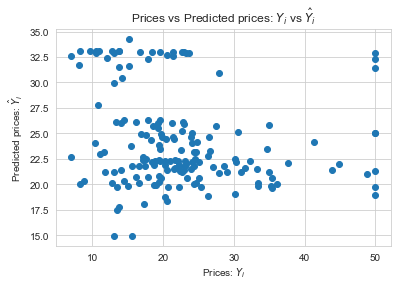

In [356]:

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

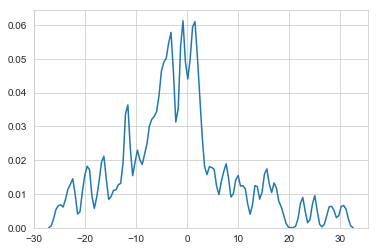

In [357]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


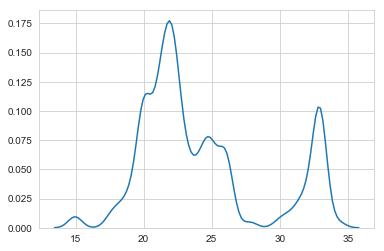

In [358]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

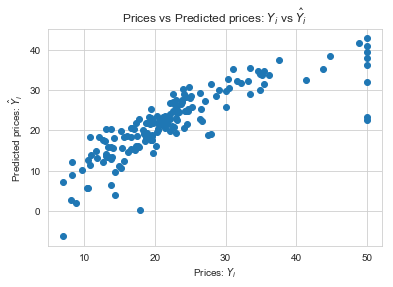

In [318]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [76]:
lm.coef_

array([-1.56381297e-01,  3.85490972e-02, -2.50629921e-02,  7.86439684e-01,
       -1.29469121e+01,  4.00268857e+00, -1.16023395e-02, -1.36828811e+00,
        3.41756915e-01, -1.35148823e-02, -9.88866034e-01,  1.20588215e-02,
       -4.72644280e-01])

In [77]:
weights

[4.000569955509809e-07,
 2.6083633931957404e-06,
 1.4121404875748355e-06,
 1.5767345064194346e-08,
 7.486583454688757e-08,
 9.330663990937375e-07,
 9.000872008279248e-06,
 5.279132255183336e-07,
 1.3224927075775278e-06,
 5.4699770621072427e-05,
 2.573750460735054e-06,
 5.2275780982991e-05,
 1.3601933620922726e-06,
 1.427183270811892e-07]

In [79]:
type(X_test)

pandas.core.frame.DataFrame

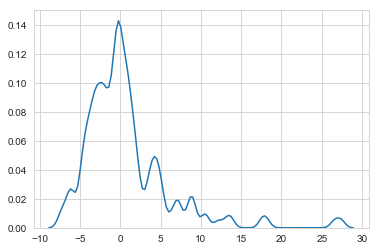

In [71]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


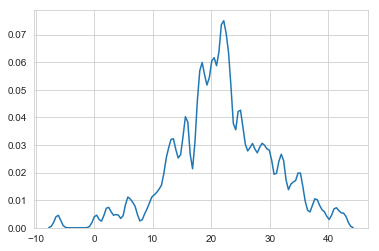

In [73]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()